In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set figure parameters for all plots
newParams = {'figure.figsize'  : (12, 6),  # Figure size
             'figure.dpi'      : 200,      # figure resolution
             'axes.titlesize'  : 20,       # fontsize of title
             'axes.labelsize'  : 11,       # fontsize of axes labels
             'axes.linewidth'  : 2,        # width of the figure box lines
             'lines.linewidth' : 1,        # width of the plotted lines
             'savefig.dpi'     : 200,      # resolution of a figured saved using plt.savefig(filename)
             'ytick.labelsize' : 11,       # fontsize of tick labels on y axis
             'xtick.labelsize' : 11,       # fontsize of tick labels on x axis
             'legend.fontsize' : 12,       # fontsize of labels in legend
             'legend.frameon'  : True,     # activate frame on lengend?
            }
plt.rcParams.update(newParams) # Set new plotting parameters

In [3]:
def initial_condition(x, x0):
    """
    """
    return np.exp(-(x-x0)**2)

In [4]:
#define spacing and x,t arrays
dx=1
dt=1
xi=0
xF = 10
t0 = 0
tF = 10
x0 = np.linspace(0,10,100)
t  = np.linspace(t0,tF,11)

# Define empty matrix where we hold x
x_mat = []

# Create the tridiagonal matrix
gamma   = -1j*(dt/dx**2)
B       = np.zeros(len(x0), dtype=complex)
B[0]    = 1
B[-1]   = 1
B[1:-1] = (1-gamma)
u = np.zeros(len(x0)-1, dtype=complex)
u[0] = 0
u[-1] = .5*gamma
u[1:-1] = (.5*gamma)
L       = np.zeros(len(x0)-1, dtype=complex)
L[0]    = .5*gamma
L[-1]   = 0
L[1:-1] = (.5*gamma)
# Create the tridiagonal matrix
A = np.diag(B, 0) + np.diag(u, 1) + np.diag(L, -1)

In [5]:
psi = []
psi0 = initial_condition(x0, 5)
area = np.trapz(initial_condition(x0, 5)**2, dx=dx)
psi0 = psi0/np.sqrt(area)

psi.append(psi0)

for i in range(1000):
    psiN = np.linalg.solve(A, psi[i])
    psi.append(psiN)

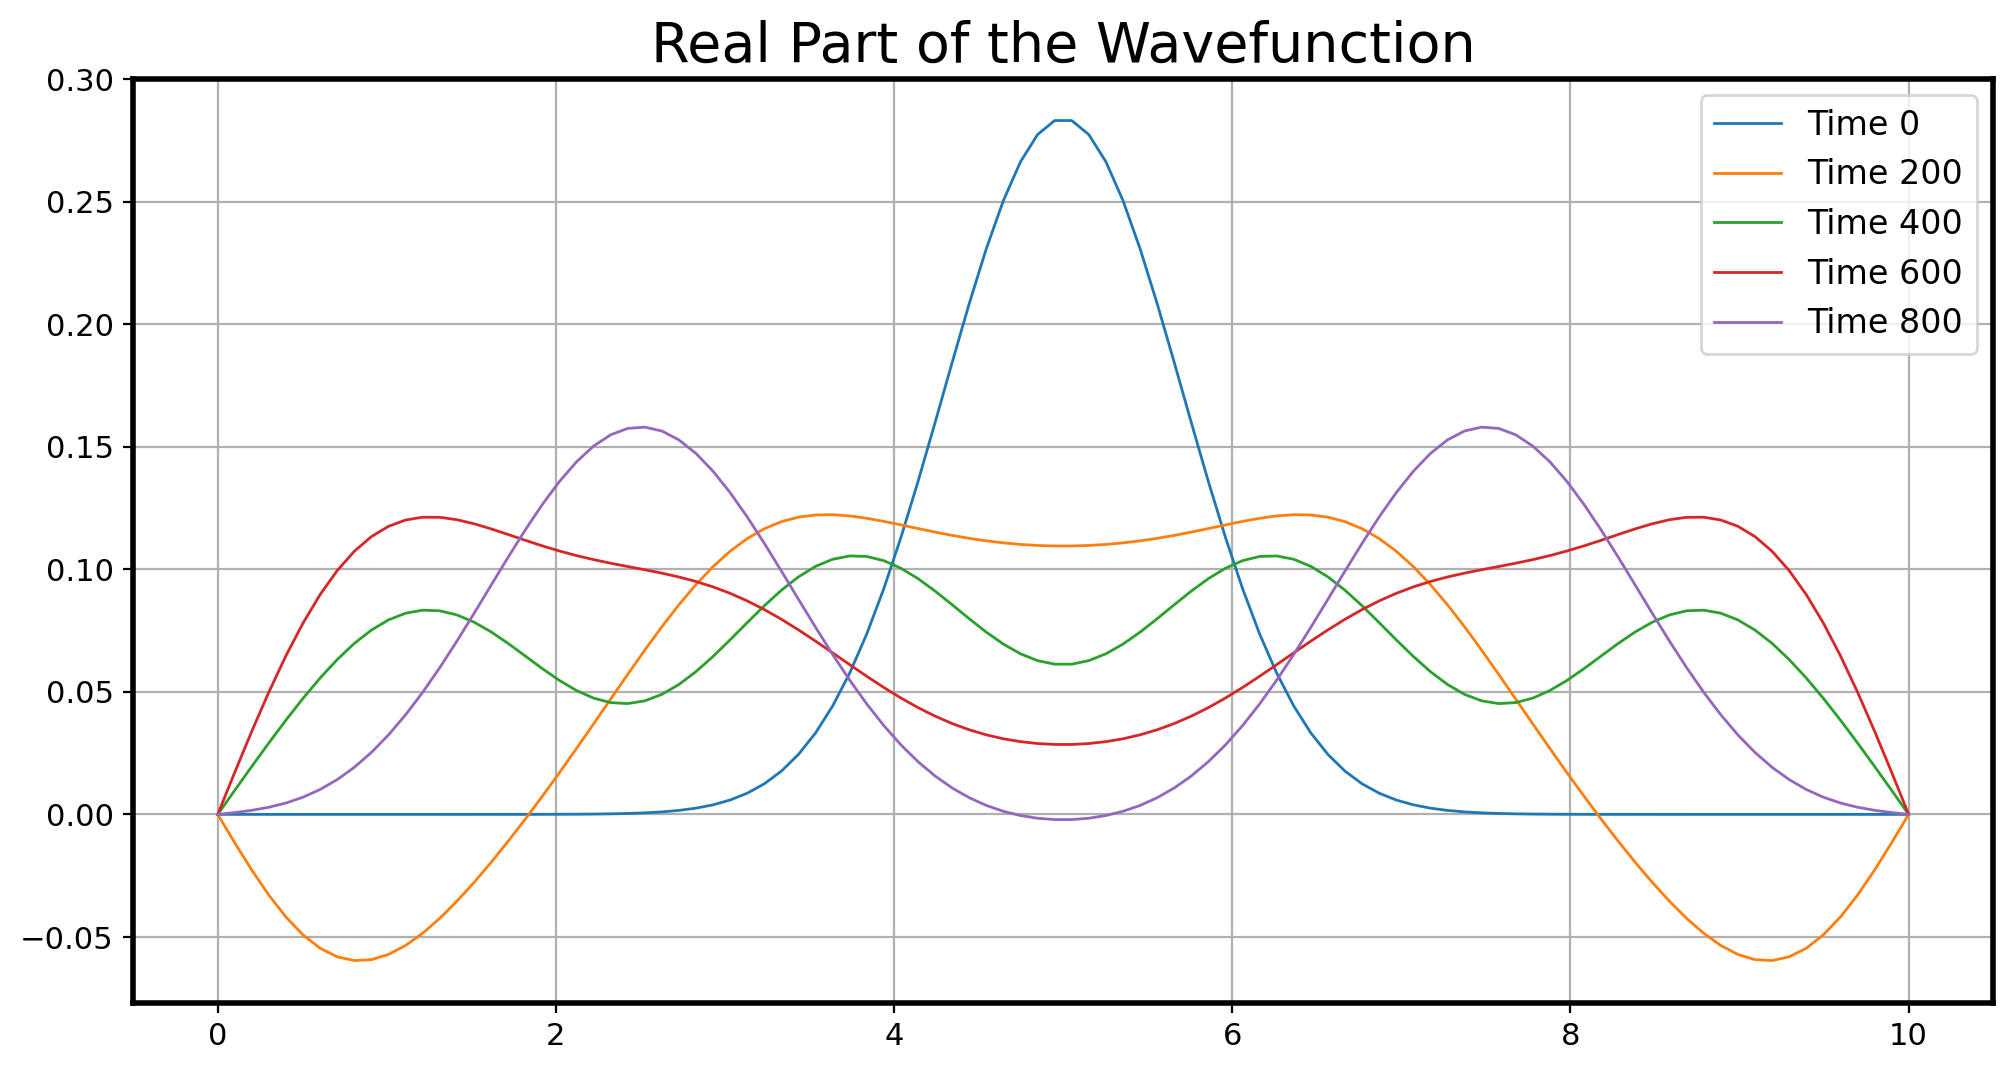

In [13]:
plt.figure()
for i in range(1000):
    if i % 200 == 0:
        plt.plot(x0, np.real(psi[i]), label="Time {}".format(i))
    # plt.plot(x0, np.real(psi[i]), label="Time {}".format(i))
plt.title("Real Part of the Wavefunction")
plt.legend()
plt.grid()
plt.show()

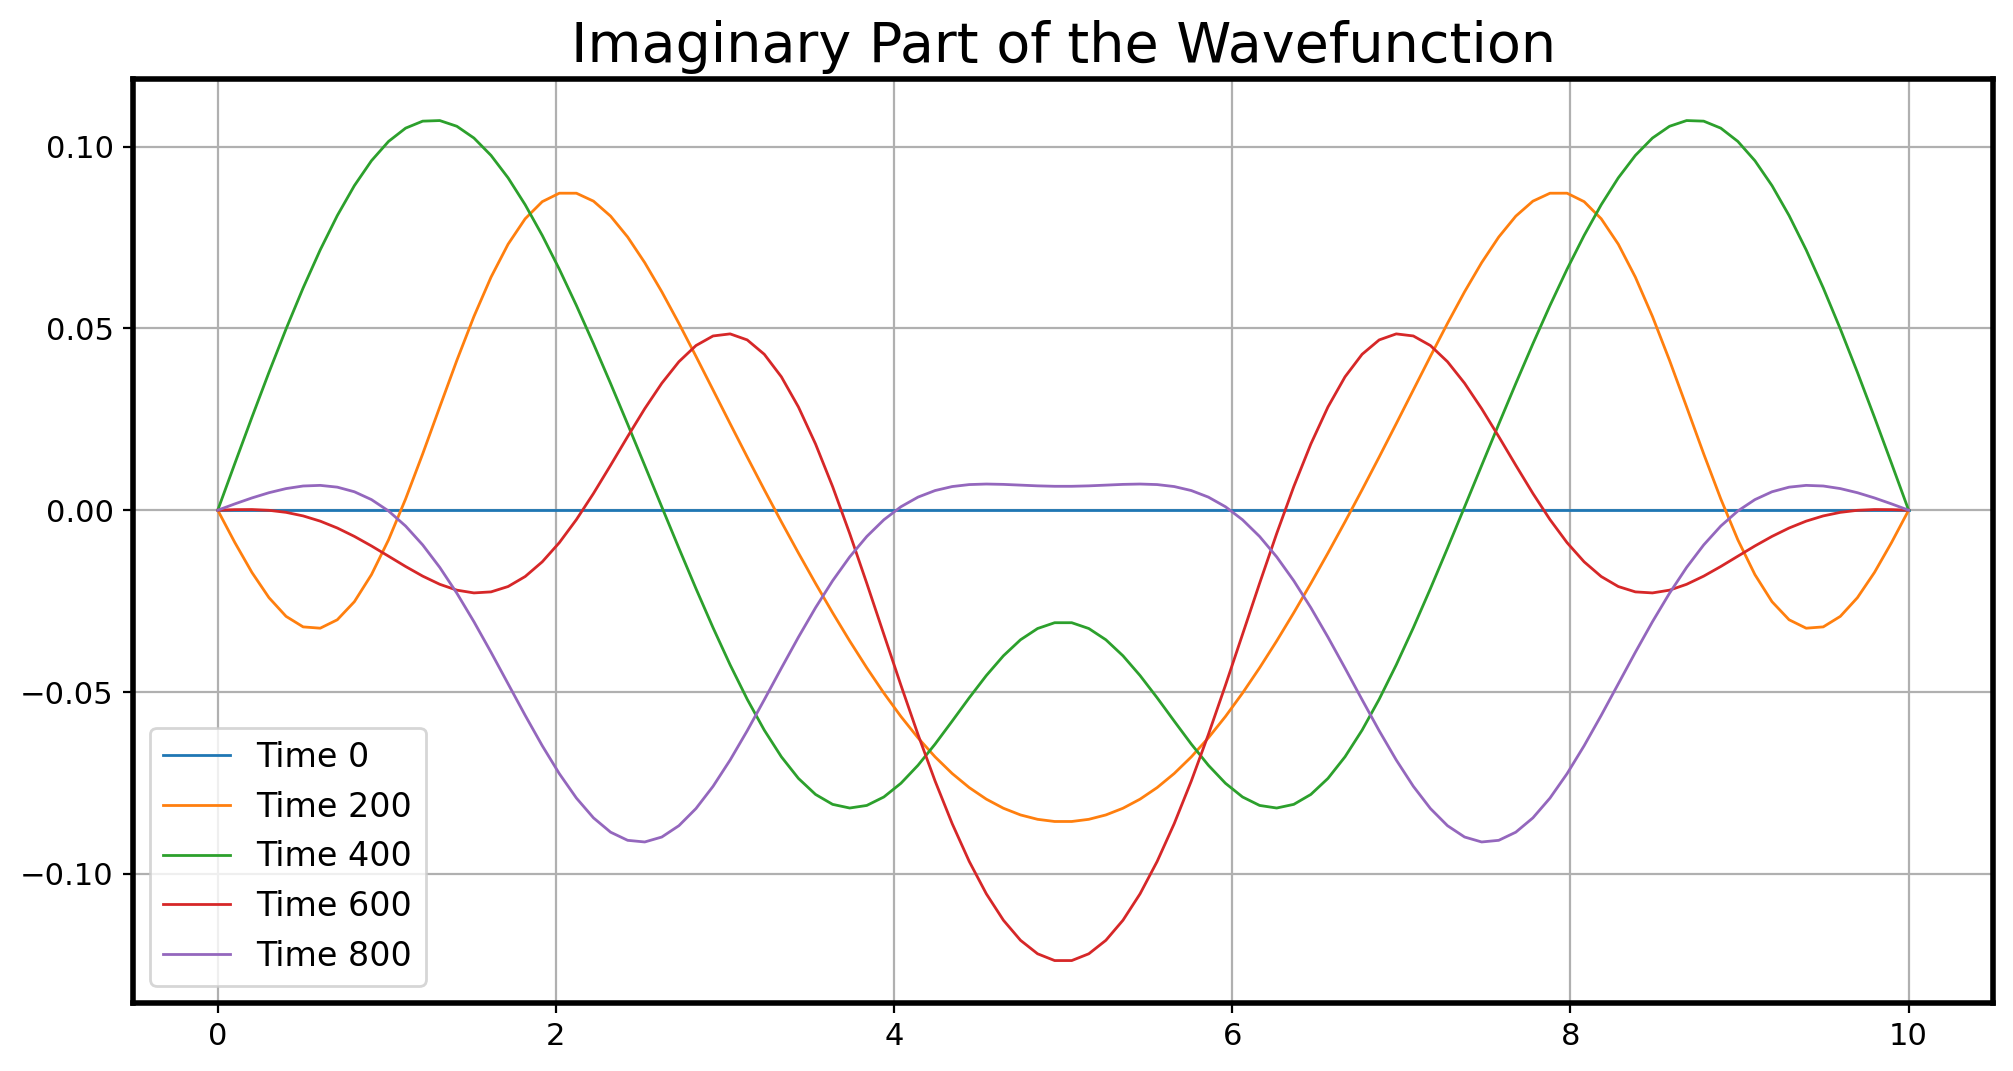

In [14]:
plt.figure()
for i in range(1000):
    if i % 200 == 0:
        plt.plot(x0, np.imag(psi[i]), label="Time {}".format(i))
plt.title("Imaginary Part of the Wavefunction")
plt.legend()
plt.grid()
plt.show()

In [8]:
# Plot the norm of the wavefunction
for i in range(1000):
    if i % 100 == 0:
        print(np.linalg.norm(psi[i]))

1.0
0.9962833137228247
0.992831680123304
0.989599529191375
0.986553773432602
0.9836692556365785
0.9809262067424125
0.9783086974759321
0.9758036354456766
0.9734000845848481


In [18]:
for i in range(1000):
    if i % 100 == 0:
        # print("P2 Norm at t = {}-----------".format(i))
        integral = np.trapz(np.abs(psi[i])**2, dx=dx)
        print("P2 Norm at t = {}: ".format(i) + str(integral))

P2 Norm at t = 0: 1.0
P2 Norm at t = 100: 0.9925804412025322
P2 Norm at t = 200: 0.9857147450564626
P2 Norm at t = 300: 0.9793072281757907
P2 Norm at t = 400: 0.9732883478741061
P2 Norm at t = 500: 0.9676052044846204
P2 Norm at t = 600: 0.9622162230740583
P2 Norm at t = 700: 0.9570879075570546
P2 Norm at t = 800: 0.9521927349489991
P2 Norm at t = 900: 0.9475077246697893
